## __Transfer Learning__
- Transfer learning refers to a technique in machine learning where a pre-trained model, typically trained on a large dataset, is used as a starting point for solving a different but related task.
- It involves using models trained on one problem as a starting point for a related problem.
- It is flexible, allowing the use of pre-trained models directly, as feature extraction preprocessing, and integrated into entirely new models.



## Steps to Be Followed:
1. Importing the required libraries
2. Adding classifier layers
3. Preprocessing and feature extraction

In [50]:
#only for mac or when you get an ssl warning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error


# Exercise 1A - Using Vanilla VGG16

- VGG16 is a convolutional neural network model that’s used for image recognition. 
- It’s unique in that it has only 16 layers that have weights, as opposed to relying on a large number of hyper-parameters. 
- It’s considered one of the best vision model architectures and able to classify 1000 images of **1000 different categories** with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.

![vgg16](https://miro.medium.com/v2/resize:fit:827/1*UeAhoKM0kJfCPA03wt5H0A.png)

### Step 1: Importing the Required Libraries

- The **from tensorflow.keras.utils import load_img** is used to load an image file from the file system.

- The **from tensorflow.keras.utils import img_to_array** is used to convert an image loaded with load_img into a NumPy array.

- The **from keras.applications.vgg16 import preprocess_input** is used to preprocess the input image array before feeding it to the VGG16 model. VGG16 expects the input images to be preprocessed in a specific way.

- The **from keras.applications.vgg16 import VGG16** is used to import the VGG16 model architecture. VGG16 is a popular convolutional neural network model pre-trained on the ImageNet dataset for image classification.

In [65]:
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array

# import a pretrain model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np

#### Standard VGG16

In [52]:
model = VGG16() 
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

- Observe the complexity of VGG16 and it's layers
- Take a look at the final output of 1000 classes
- Now let's test the default model on a new image

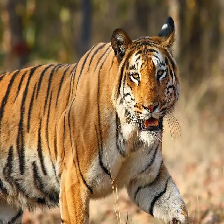

In [53]:
#load the image
my_image = load_img('datasets/tiger.jpeg', target_size=(224, 224)) #resizing the image for VGG16 compatibility (expects this size only)
my_image

In [54]:
# convert the image pixels to numpy array

my_image_arr = img_to_array(my_image) #or my_image = np.array(my_image)
my_image_arr[:2]

array([[[120., 102.,  62.],
        [126., 107.,  67.],
        [129., 109.,  72.],
        ...,
        [128., 112.,  87.],
        [132., 116.,  91.],
        [137., 121.,  96.]],

       [[120., 102.,  62.],
        [126., 106.,  69.],
        [129., 109.,  72.],
        ...,
        [126., 110.,  85.],
        [130., 114.,  89.],
        [136., 120.,  95.]]], dtype=float32)

In [55]:
my_image_arr.shape

(224, 224, 3)

In [56]:
# reshape the data for model compatibility
my_image_arr = my_image_arr.reshape((1, my_image_arr.shape[0], my_image_arr.shape[1], my_image_arr.shape[2]))

#prepare the image

my_image_arr = preprocess_input(my_image_arr) # keras image utility for imagenet compatibility 
my_image_arr[:2]

array([[[[-41.939003 , -14.778999 ,  -3.6800003],
         [-36.939003 ,  -9.778999 ,   2.3199997],
         [-31.939003 ,  -7.7789993,   5.3199997],
         ...,
         [-16.939003 ,  -4.7789993,   4.3199997],
         [-12.939003 ,  -0.7789993,   8.32     ],
         [ -7.939003 ,   4.2210007,  13.32     ]],

        [[-41.939003 , -14.778999 ,  -3.6800003],
         [-34.939003 , -10.778999 ,   2.3199997],
         [-31.939003 ,  -7.7789993,   5.3199997],
         ...,
         [-18.939003 ,  -6.7789993,   2.3199997],
         [-14.939003 ,  -2.7789993,   6.3199997],
         [ -8.939003 ,   3.2210007,  12.32     ]],

        [[-48.939003 , -21.779    , -10.68     ],
         [-42.939003 , -18.779    ,  -5.6800003],
         [-37.939003 , -15.778999 ,  -2.6800003],
         ...,
         [-20.939003 ,  -8.778999 ,   0.3199997],
         [-16.939003 ,  -4.7789993,   4.3199997],
         [-10.939003 ,   1.2210007,  10.32     ]],

        ...,

        [[-33.939003 , -41.779    , -4

#### Make Prediction Using VGG16

In [57]:
# perform prediction on the image
prediction = model.predict(my_image_arr)

#decode the prediction
decoded_predictions = decode_predictions(prediction)
decoded_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


[[('n02129604', 'tiger', 0.8000071),
  ('n02123159', 'tiger_cat', 0.19970883),
  ('n02127052', 'lynx', 0.00012133386),
  ('n02128925', 'jaguar', 0.00010900327),
  ('n02128385', 'leopard', 1.3247074e-05)]]

In [58]:
# cleared output
decoded_predictions

[[('n02129604', 'tiger', 0.8000071),
  ('n02123159', 'tiger_cat', 0.19970883),
  ('n02127052', 'lynx', 0.00012133386),
  ('n02128925', 'jaguar', 0.00010900327),
  ('n02128385', 'leopard', 1.3247074e-05)]]

output above has the top 5 labels with their probabilities. The output can be enhanced using the following: 

In [87]:
## more readable output
for i, (imagenet_id, label, prob) in enumerate(decoded_predictions[0]):
    print(f'{i + 1}: {label} ({prob:2.2%})')

1: tiger (80.00%)
2: tiger_cat (19.97%)
3: lynx (0.01%)
4: jaguar (0.01%)
5: leopard (0.00%)


> We can also test it on other objects

## Customization: Adding Classifier Layers and Different Dimensions
- It demonstrates how to load a pre-trained VGG16 model without its classifier layers and then add new custom classifier layers on top of it.
- The new model is defined by connecting the output of the pre-trained VGG16 model to a flatten layer, followed by a dense layer with 1024 units and ReLU activation, and finally a dense layer with 10 units and softmax activation for multi-class classification.
- The model summary provides an overview of the architecture and layer configurations.

### Customized VGG16 - Dog vs Cat

> NOTE: It's generally recommended to use input sizes that are close to the original size (224, 224) used during pre-training, as significant changes in input size may negatively impact the model's performance. If you need to work with significantly different input sizes, you may need to fine-tune the pre-trained model or consider using a different pre-trained model that was trained on a dataset with input sizes closer to your requirements.



- First, if we look up the type of model, we see it's `Functional`, not `Sequential`
- We've been working with `Sequential` in the previous training
- We'll need to convert it to `Sequential` type of model to customize it

In [63]:
type(model)

keras.src.models.functional.Functional

In [ ]:
from keras.models import Model, Sequential
 
custom_model = Sequential()

#add previous layers in VGG16
for layer in model

In [92]:
inp_sh=(300,300,3) # custom input

custom_model = VGG16(weights='imagenet',
              include_top=False, #removes the fully connected layer
               input_shape=inp_sh) 
custom_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 300, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 150, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- Notice how the fully connected layer is absent
- We need to freeze the pre-trained layers
- if you don't do this, your whole model will start training from scratch. Will need lots of GPU power

In [93]:
#iterate over every layer 
for layer in custom_model.layers:
    layer.trainable = False

Now we can customize our model by adding the fully connected layer

In [94]:
#using the power of VGG16 to solve for my specific problem
flat_layer = Flatten()(custom_model.output) # grab the last layer or use 
hidden_layer = Dense(1024, activation='relu')(flat_layer) #append the flat layer to the hidden layer

output_layer = Dense(1, activation='sigmoid')(hidden_layer) #customize it to 2 classes dog vs cat - current layer has 1000 categories
#note: for multiple categories, use softmax with more than 1 neurons

custom_model_final = Model(inputs=custom_model.inputs, outputs=output_layer)

custom_model_final.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 300, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 150, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │    42,468,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,184,065 (218.14 MB)

 Trainable params: 42,469,377 (162.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

- Now we can see the model with the custom fully connected layer
- The summary also specified the Trainable and Non-Trainable params
- Now we need to compile and train the model

In [95]:
custom_model_final.compile(optimizer='adam',
              loss='binary_crossentropy',  #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) for multiclass
              metrics=['accuracy'])

### Download Training Dataset and Split

1. Go to https://www.microsoft.com/en-us/download/details.aspx?id=54765
2. Download
3. Unzip the folder and save it in the same directory of the notebook or reference it using path

In [76]:
ls /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages

Cat/ Dog/


In [99]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Loading the dataset, and automatically splitting it into train and validation sets
def train_test_splitter(image_dir, batch_size, img_height, img_width):
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  return train_ds, val_ds

In [100]:
image_dir = "/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages"
batch_size = 32
img_height = 300
img_width = 300

train_ds, val_ds = train_test_splitter(image_dir, batch_size, img_height, img_width)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


#### Features and Labels Definition
- Features: In the context of image classification with CNNs, the features are the images themselves. When you use image_dataset_from_directory, it automatically reads the images from the specified directory, and these images are treated as input features. The image_size parameter in the function call determines the size to which your images will be resized. This is important because the CNN requires a fixed input size.

- Labels: The labels (or targets) for your model are derived from the directory structure of your data. Each subdirectory within the main data directory is treated as a separate class. The name of the subdirectory is used as the label for all images within it. For example, in your case, you have two folders named cat and dog. Images inside the cat folder will automatically be labeled as "cat", and similarly, images inside the dog folder will be labeled as "dog".



#### Preprocessing

In [117]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# normalization 
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


NameError: name 'layers' is not defined

#### Training

In [96]:
epochs=10
history = custom_model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10


Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
2024-03-25 18:27:07.324544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]


InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_7727]

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


We're running into an error due to corrupt images. To address this issue, we need to do the following:
- scan for bad images
- delete them

In [98]:
from PIL import Image
import os

def check_images(s_dir, ext_list):
    bad_images = []
    bad_ext = []
    for folder in os.listdir(s_dir):
        print("Checking:", folder)
        folder_path = os.path.join(s_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                try:
                    img = Image.open(file_path)
                    img.verify()  # I perform also verify, don't know if he sees other types o defects
                    img.close()  # reload is necessary in my case
                    img = Image.open(file_path)  # reload is necessary in my case
                    img.transpose(Image.FLIP_LEFT_RIGHT)
                    img.close()
                except (IOError, SyntaxError) as e:
                    print('Bad file:', file_path)
                    bad_images.append(file_path)
                except Exception as e:
                    print('Bad file extension:', file_path)
                    bad_ext.append(file_path)
    return bad_images, bad_ext

s_dir =  image_dir # update this to your dataset's path
ext_list = ['jpg', 'jpeg']  # add or remove extensions based on your dataset
bad_images, bad_ext = check_images(s_dir, ext_list)

print("Identified bad images:", bad_images)
print("Files with bad extensions:", bad_ext)


Checking: Cat
Bad file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db
Bad file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg
Checking: .DS_Store
Checking: Dog


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Bad file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db
Bad file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg
Identified bad images: ['/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db', '/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg', '/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db', '/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg']
Files with bad extensions: []


In [102]:
bad_images

['/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db',
 '/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg',
 '/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db',
 '/Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg']

In [103]:
#delete bad images:

for bad_image in bad_images:
     # Check if the file exists
    if os.path.isfile(bad_image):
        # Delete the file
        os.remove(bad_image)
        print(f"Deleted file: {bad_image}")
    else:
        print(f"File not found: {bad_image}")

Deleted file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db
Deleted file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg
Deleted file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db
Deleted file: /Users/bassel_instructor/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg


Now, repeat the previous steps

In [104]:

train_ds, val_ds = train_test_splitter(image_dir, batch_size, img_height, img_width)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


Notice the difference in the counts after deleting the images.

In [105]:
epochs=10
history = custom_model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
149/625 ━━━━━━━━━━━━━━━━━━━━ 28:50 4s/step - accuracy: 0.8968 - loss: 9.4227

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


168/625 ━━━━━━━━━━━━━━━━━━━━ 27:38 4s/step - accuracy: 0.9016 - loss: 8.8064

2024-03-25 18:53:27.076028: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


KeyboardInterrupt: 

We stopped the CNN above since it takes time to finish. We reached 90% accuracy anyway.

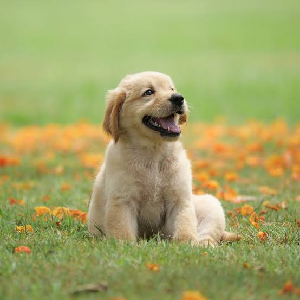

In [108]:
my_image = load_img('puppy.jpeg', target_size=(300, 300)) #resizing the image for VGG16 compatibility (expects this size only)
my_image

In [115]:
my_image_arr = img_to_array(my_image)/255.0
#my_image_arr = my_image_arr.reshape((1, my_image_arr.shape[0], my_image_arr.shape[1], my_image_arr.shape[2]))
my_image_arr = np.expand_dims(my_image_arr, axis=0)

my_image_arr = preprocess_input(my_image_arr)

prediction = custom_model_final.predict(my_image_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [116]:
# Since it's a binary classification, determine the class based on the prediction value

predicted_class = 'dog' if prediction[0][0] > 0.5 else 'cat'
predicted_class

'dog'

- In a binary classification model like the dog vs. cat classifier, the final layer of the model often uses a sigmoid activation function. The sigmoid function outputs a probability score between 0 and 1, indicating the likelihood of the input being in one class versus the other.
    - If the sigmoid output is greater than 0.5, the model predicts the input is more likely the positive class (which we've labeled as "dog").
    - If the output is less than or equal to 0.5, the input is predicted to be the negative class ("cat").
- In a typical binary classification problem the class labels are typically assigned numerical values according to folder order (cat then dog). 


## Saving and then Loading the Trained Model

You can save your trained TensorFlow/Keras model in HDF5 format (.h5 file) using the `save()` method. This will serialize your model architecture, weights, and training configuration into a single file, allowing you to load and reuse it later for making predictions or further training.


In [ ]:

# Assuming your model is named 'model' and has been trained
custom_model_final.save("path_to_save_model.h5")


To load the saved model and use it for predictions or further training, you can use the `load_model()` function:

In [ ]:
from tensorflow.keras.models import load_model


# Load the saved model
loaded_model = load_model("path_to_save_model.h5")

# Exercise 2 - Building VGG16 from Scratch

In [ ]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.engine.topology import get_source_inputs


In [ ]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model



In [ ]:
model = VGGupdated(classes = 2) # bedroom and diningroom

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('rooms_dataset')

room_types = os.listdir('rooms_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))



# Exercise 3 - AlexNet

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        preprocessing.RandomFlip("horizontal_and_vertical"),
        preprocessing.RandomRotation(0.3),
        preprocessing.RandomZoom(0.3)
    ]
)

rescale = preprocessing.Rescaling(1./255)

In [ ]:
# AlexNet variation implementation with Functional API in Tensorflow 2
def AlexNet():
    inputs = tf.keras.Input(shape=(256, 256, 3), name='image')
    x = data_augmentation(inputs)
    x = rescale(x)
    x = layers.Conv2D(96, (11, 11), strides=4, activation='relu')(x)
    x = layers.MaxPool2D((3, 3), strides=2)(x)
    x = layers.Conv2D(256, (5, 5), strides=1, padding='same', activation='relu')(x)
    x = layers.MaxPool2D((3, 3), strides=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = layers.Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((3, 3), strides=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs, name='AlexNet')
    return model

# Exercise 3

`pip install tensorflow_hub`

`pip install opencv-python`

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It provides a wide range of functionalities for image and video processing, including:

1. Image processing operations such as filtering, edge detection, morphology, and color space conversion.
2. Feature detection and extraction techniques like corner detection, blob detection, and histogram of oriented gradients (HOG).
3. Object detection and recognition algorithms such as Haar cascades, HOG cascades, and deep learning-based object detection models (e.g., YOLO, SSD).
4. Video analysis functionalities such as motion tracking, optical flow, and video stabilization.
5. Camera calibration and 3D reconstruction techniques.
6. Machine learning algorithms for image classification, clustering, and regression.

OpenCV is written in C++ and has bindings for various programming languages, including Python, Java, and MATLAB. The Python bindings (cv2 module) provide easy-to-use interfaces for accessing OpenCV functionalities in Python scripts.


In [28]:
import numpy as np
import cv2 #pip install opencv-python

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)

In [32]:
input_img_shape = (224, 224, 3)

classifier = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=input_img_shape+(3,))